In [1]:
# Muhammad Reza
# ECS 170 Homework 2
# Summer Session 2 2023
# September 7, 2023

In [2]:
# import appropriate modules and files
import mnist_reader
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# reading data through load_mnist function in mnist_reader.py, which is located in the same folder as this file
# the four files containing images and labels are located in data/fashion folder
# data folder is in the same folder as this file
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind = 'train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind = 't10k')

In [4]:
# normalizing pixel values to be within [0, 1]
X_train = X_train / 255.0 
X_test = X_test / 255.0

In [5]:
# reshaping data to pass into our CNN
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [6]:
# building our convolutional neural network with given specifications for each layer
# flatten implemented after second Conv2D layer in order to ensure dimension consistency for model training
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(28, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(56, (3, 3), activation = 'relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(56, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

In [7]:
# printing the summary of the model, which includes the number of trainable parameters
print("The summary of our neural network, which contains the number of trainable parameters, can be seen below.")
cnn.summary()

The summary of our neural network, which contains the number of trainable parameters, can be seen below.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 56)        14168     
                                                                 
 flatten (Flatten)           (None, 6776)              0         
                                                                 
 dense (Dense)               (None, 56)                379512    
                                                                 
 dense_1 (Dense) 

In [8]:
print("As given by the model summary, our model has 394,530 trainable parameters.")

As given by the model summary, our model has 394,530 trainable parameters.


In [9]:
# reserving last 12000 samples for validation
X_val = X_train[-12000:]
y_val = y_train[-12000:]
X_train = X_train[:-12000]
y_train = y_train[:-12000]

In [10]:
# compiling our model
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [11]:
# training the model with batch size 32 for 10 epochs
history = cnn.fit(X_train, y_train, batch_size = 32, epochs = 10, validation_data = (X_val, y_val))

Epoch 1/10
1500/1500 [==============================] - 25s 16ms/step - loss: 0.4381 - accuracy: 0.8435 - val_loss: 0.3142 - val_accuracy: 0.8911
Epoch 2/10
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2882 - accuracy: 0.8960 - val_loss: 0.3003 - val_accuracy: 0.8931
Epoch 3/10
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2337 - accuracy: 0.9147 - val_loss: 0.2517 - val_accuracy: 0.9054
Epoch 4/10
1500/1500 [==============================] - 30s 20ms/step - loss: 0.2016 - accuracy: 0.9255 - val_loss: 0.2475 - val_accuracy: 0.9111
Epoch 5/10
1500/1500 [==============================] - 28s 19ms/step - loss: 0.1724 - accuracy: 0.9360 - val_loss: 0.2292 - val_accuracy: 0.9197
Epoch 6/10
1500/1500 [==============================] - 28s 19ms/step - loss: 0.1471 - accuracy: 0.9451 - val_loss: 0.2383 - val_accuracy: 0.9175
Epoch 7/10
1500/1500 [==============================] - 30s 20ms/step - loss: 0.1250 - accuracy: 0.9536 - val_loss: 0.2758 -

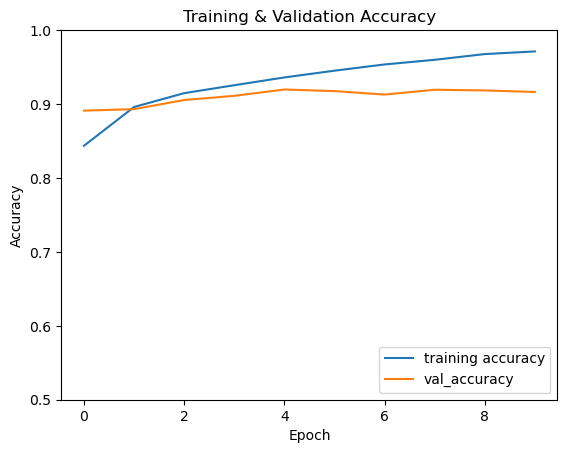

In [12]:
# plotting training accuracy and validation accuracy over all 10 epochs
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')

# labeling the title and axes
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# formatting the legend and the range of the y-axis
plt.ylim([0.5, 1])
plt.legend(loc = 'lower right')

In [13]:
# evaluating our trained model on the test set
test_loss, test_accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2977 - accuracy: 0.9155


In [14]:
# printing test accuracy
print("Accuracy of our CNN on the test set:", test_accuracy)

Accuracy of our CNN on the test set: 0.9154999852180481


In [15]:
# dictionary of labels
labels = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

In [16]:
# predicting labels to observe instances in which model misclassifies
y_pred = cnn.predict(X_test, verbose = 0)

# one-hot encoding our prediction into labels that follow the same format as the test labels
y_pred_classes = np.argmax(y_pred, axis = 1)

In [17]:
# function for displaying one misclassified image of a specific class (of a specific type of clothing)
# the function takes a specific label index as input
def displayMisclassifiedImage(label):
    for j in range(9999):            
        if y_test[j] == label:
                
            if y_pred_classes[j] != y_test[j]:
                plt.imshow(X_test[j], cmap = 'gray')
                # formatting title to include predicted label vs actual label
                plt.title("Predicted: {}\nTrue: {}".format(labels[y_pred_classes[j]], labels[y_test[j]]))
                
                # break out of the loop once a single misclassified image is found
                break

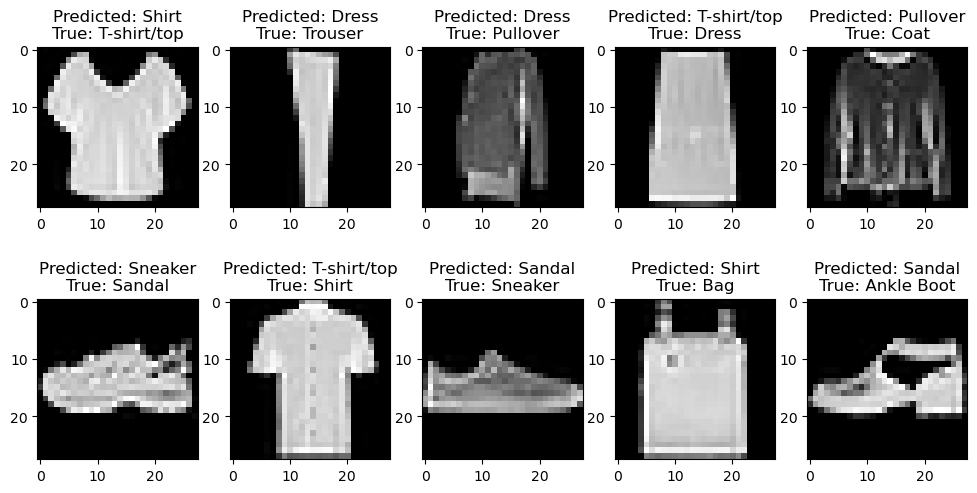

In [18]:
# calling upon previous function in loop to display one misclassified image of each class
# including plot formatting for better visualization
fig = plt.figure(figsize = (12, 6))
for i in range(10):
    fig.add_subplot(2, 5, i+1)
    displayMisclassifiedImage(i)

In [19]:
# general comments about the model's performance
print("After training the model across 10 epochs, the validation loss was very small.")
print("The validation accuracy was also very high after the 10th epoch.") 
print("This indicates that the model learned the validation data very well.")
print("This translated quite well to our test set, as our trained model had high accuracy in predicting the test labels.")
print("However, the model was not perfect, and there were instances for each class in which the model misclassified.")
print("The model definitely could have been better to avoid some of these mistakes.")
print("Some of these mistakes, however, are mistakes that humans would make, given that the images are given blurry.")
print("For example, mistaking sneakers for sandals and vice-versa is a mistake humans could very much make given these images.")
print("While our neural network was not perfect, it was still very effective in classifying clothing.")

After training the model across 10 epochs, the validation loss was very small.
The validation accuracy was also very high after the 10th epoch.
This indicates that the model learned the validation data very well.
This translated quite well to our test set, as our trained model had high accuracy in predicting the test labels.
However, the model was not perfect, and there were instances for each class in which the model misclassified.
The model definitely could have been better to avoid some of these mistakes.
Some of these mistakes, however, are mistakes that humans would make, given that the images are given blurry.
For example, mistaking sneakers for sandals and vice-versa is a mistake humans could very much make given these images.
While our neural network was not perfect, it was still very effective in classifying clothing.
